<a href="https://colab.research.google.com/github/nitinfaye/unicare-camp-report-/blob/main/unicare_camp_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import os


In [ ]:
data = pd.read_excel("Dec22-Jan23 PD NPD Data 1045 ( Nitin Faye Sir ).xlsx")
data.head()

,Timestamp,Office Name & City,Manager Name,My Name,Date of Purchase,Name of Patient/Customer,Age Bracket,Gender,Contact Number,Whats app number,Area / Location,Existing Diseases,Current Symptoms,Unicare Medicine,Turnover,Data PD / NPD
0,2022/12/01 4:47:57 PM GMT+5:30,Unicare Health center - Thane,Pravin sir / Somnath sir,Laxmi yadav,2022-12-01,Padurang dhundsikar,60-70,Male,9372295800,NaN,Chembur,Diabetes;Acidity,NaN,NaN,NaN,NPD
1,2022/12/01 4:56:26 PM GMT+5:30,Unicare Health center - Thane,Pravin sir / Somnath sir,siddhi surve,2022-11-29,sanjay Gupta,56-60,Male,8779717389,NaN,svc bank koparkhairane,Blood Pressure,NaN,Ht norm,400.0,PD
2,2022/12/01 5:13:51 PM GMT+5:30,Unicare Health center - Thane,Pravin sir / Somnath sir,siddhi surve,2022-11-29,sanjay bansode,41-45,Male,9870904277,NaN,svc bank koparkhairane,Diabetes,NaN,Diavera juice,500.0,PD
3,2022/12/01 5:19:08 PM GMT+5:30,Unicare Health center - Thane,Pravin sir / Somnath sir,siddhi surve,2022-11-29,jayesh patil,21-25,Male,7021712100,NaN,svc bank koparkhairane,NaN,Weakness / Tiredness,urjitam,300.0,PD
4,2022/12/01 5:24:02 PM GMT+5:30,Unicare Health center - Thane,Pravin sir / Somnath sir,siddhi surve,2022-12-01,maybuk naik,46-50,Male,9892001746,NaN,Chembur,Diabetes;Acidity,NaN,"DAP,Nirmal urja churn",1000.0,PD


In [ ]:
data.describe()

,Contact Number,Whats app number,Turnover
count,1.045000e+03,4.000000e+00,271.000000
mean,9.538298e+09,8.822918e+09,611.402214
std,9.356292e+09,6.613580e+08,412.367452
min,8.185407e+07,8.286172e+09,80.000000
25%,8.327402e+09,8.423195e+09,250.000000
50%,9.305914e+09,8.618098e+09,500.000000
75%,9.821213e+09,9.017820e+09,800.000000
max,9.892642e+10,9.769304e+09,2500.000000


In [ ]:
data.isnull().sum()

Timestamp                      0
Office Name & City             0
Manager Name                   0
My Name                        0
Date of Purchase               0
Name of Patient/Customer       0
Age Bracket                    0
Gender                         0
Contact Number                 0
Whats app number            1041
Area / Location                0
Existing Diseases             15
Current Symptoms             795
Unicare Medicine             770
Turnover                     774
Data PD / NPD                  0
dtype: int64

In [ ]:
whats_data = data[["Date of Purchase","Whats app number","Existing Diseases"]]
whats_data

,Date of Purchase,Whats app number,Existing Diseases
0,2022-12-01,NaN,Diabetes;Acidity
1,2022-11-29,NaN,Blood Pressure
2,2022-11-29,NaN,Diabetes
3,2022-11-29,NaN,NaN
4,2022-12-01,NaN,Diabetes;Acidity
...,...,...,...
1040,2023-01-30,NaN,Diabetes;Acidity
1041,2023-01-30,NaN,Blood Pressure
1042,2023-01-31,NaN,Diabetes;Blood Pressure
1043,2023-01-31,NaN,Diabetes


In [ ]:
whats_data = data[["Date of Purchase","Whats app number","Existing Diseases"]]
new_data = data[["Date of Purchase","Turnover","Existing Diseases"]]
new_data.head()

,Date of Purchase,Turnover,Existing Diseases
0,2022-12-01,NaN,Diabetes;Acidity
1,2022-11-29,400.0,Blood Pressure
2,2022-11-29,500.0,Diabetes
3,2022-11-29,300.0,NaN
4,2022-12-01,1000.0,Diabetes;Acidity


In [ ]:
whats_data.isnull().sum()

Date of Purchase        0
Whats app number     1041
Existing Diseases      15
dtype: int64

In [ ]:
whatsapp_number = whats_data.dropna()
new_clean_data =new_data.dropna()
new_clean_data

,Date of Purchase,Turnover,Existing Diseases
1,2022-11-29,400.0,Blood Pressure
2,2022-11-29,500.0,Diabetes
4,2022-12-01,1000.0,Diabetes;Acidity
5,2022-12-01,250.0,Acidity;Constipation / Gas
6,2022-12-01,500.0,Acidity;Constipation / Gas
...,...,...,...
880,2023-01-27,200.0,Joint & Muscle pain
881,2023-01-28,800.0,Acidity;Skin & Hair Problem
882,2023-01-28,500.0,Diabetes
883,2023-01-28,1000.0,Acidity;Constipation / Gas;Asthma


In [ ]:
unique_diseases = list(new_clean_data['Existing Diseases'].unique())
unique_diseases

['Blood Pressure',
 'Diabetes',
 'Diabetes;Acidity',
 'Acidity;Constipation / Gas',
 'Acidity;Constipation / Gas;Skin & Hair Problem',
 'Obesity',
 'Diabetes;Acidity;Constipation / Gas',
 'Acidity',
 'Joint & Muscle pain;Acidity;Constipation / Gas',
 'Female Problems',
 'Joint & Muscle pain',
 'Skin & Hair Problem;Obesity',
 'Diabetes;Skin & Hair Problem',
 'Joint & Muscle pain;Acidity;Constipation / Gas;Skin & Hair Problem',
 'Constipation / Gas',
 'Diabetes;Joint & Muscle pain',
 'Diabetes;Blood Pressure',
 'Diabetes;Constipation / Gas',
 'Joint & Muscle pain;Acidity',
 'Diabetes;Joint & Muscle pain;Acidity',
 'Diabetes;Acidity;Thyroid',
 'Diabetes;Blood Pressure;Arthritis;Joint & Muscle pain;Acidity;Constipation / Gas',
 'Acidity;Obesity',
 'Diabetes;Female Problems',
 'Acidity;Constipation / Gas;Female Problems',
 'Acidity;Female Problems',
 'Skin & Hair Problem;Female Problems',
 'Male Sexual Problems',
 'Acidity;Sleep apnea',
 'Acidity;Heart Disease',
 'Heart Disease',
 'Acidity;

In [ ]:
latest_turnover = new_clean_data['Turnover']
latest_turnover

1       400.0
2       500.0
4      1000.0
5       250.0
6       500.0
        ...  
880     200.0
881     800.0
882     500.0
883    1000.0
884     450.0
Name: Turnover, Length: 260, dtype: float64

In [ ]:
disease_turnover = []
no_turnover = []
for i in unique_diseases:
    cases = latest_turnover[new_clean_data['Existing Diseases']==i].sum()
    if cases > 1:
       disease_turnover.append(cases)
    else:
       no_turnover.append(i)
for i in no_turnover:
    unique_diseases.remove(i)

In [ ]:
for i in range(len(unique_diseases)):
    disease_turnover[i] = latest_turnover[new_clean_data['Existing Diseases']==unique_diseases[i]].sum()

In [ ]:
print('total turnover by Existing Diseases:')
for i in range(len(unique_diseases)):
    print(f'{unique_diseases[i]}  : {disease_turnover[i]} price')

total turnover by Existing Diseases:
Blood Pressure  : 2350.0 price
Diabetes  : 17850.0 price
Diabetes;Acidity  : 6345.0 price
Acidity;Constipation / Gas  : 15900.0 price
Acidity;Constipation / Gas;Skin & Hair Problem  : 375.0 price
Obesity  : 2700.0 price
Diabetes;Acidity;Constipation / Gas  : 2850.0 price
Acidity  : 27435.0 price
Joint & Muscle pain;Acidity;Constipation / Gas  : 3950.0 price
Female Problems  : 3750.0 price
Joint & Muscle pain  : 15950.0 price
Skin & Hair Problem;Obesity  : 1950.0 price
Diabetes;Skin & Hair Problem  : 1000.0 price
Joint & Muscle pain;Acidity;Constipation / Gas;Skin & Hair Problem  : 1210.0 price
Constipation / Gas  : 2450.0 price
Diabetes;Joint & Muscle pain  : 1250.0 price
Diabetes;Blood Pressure  : 2400.0 price
Diabetes;Constipation / Gas  : 550.0 price
Joint & Muscle pain;Acidity  : 9200.0 price
Diabetes;Joint & Muscle pain;Acidity  : 8350.0 price
Diabetes;Acidity;Thyroid  : 1450.0 price
Diabetes;Blood Pressure;Arthritis;Joint & Muscle pain;Acidity

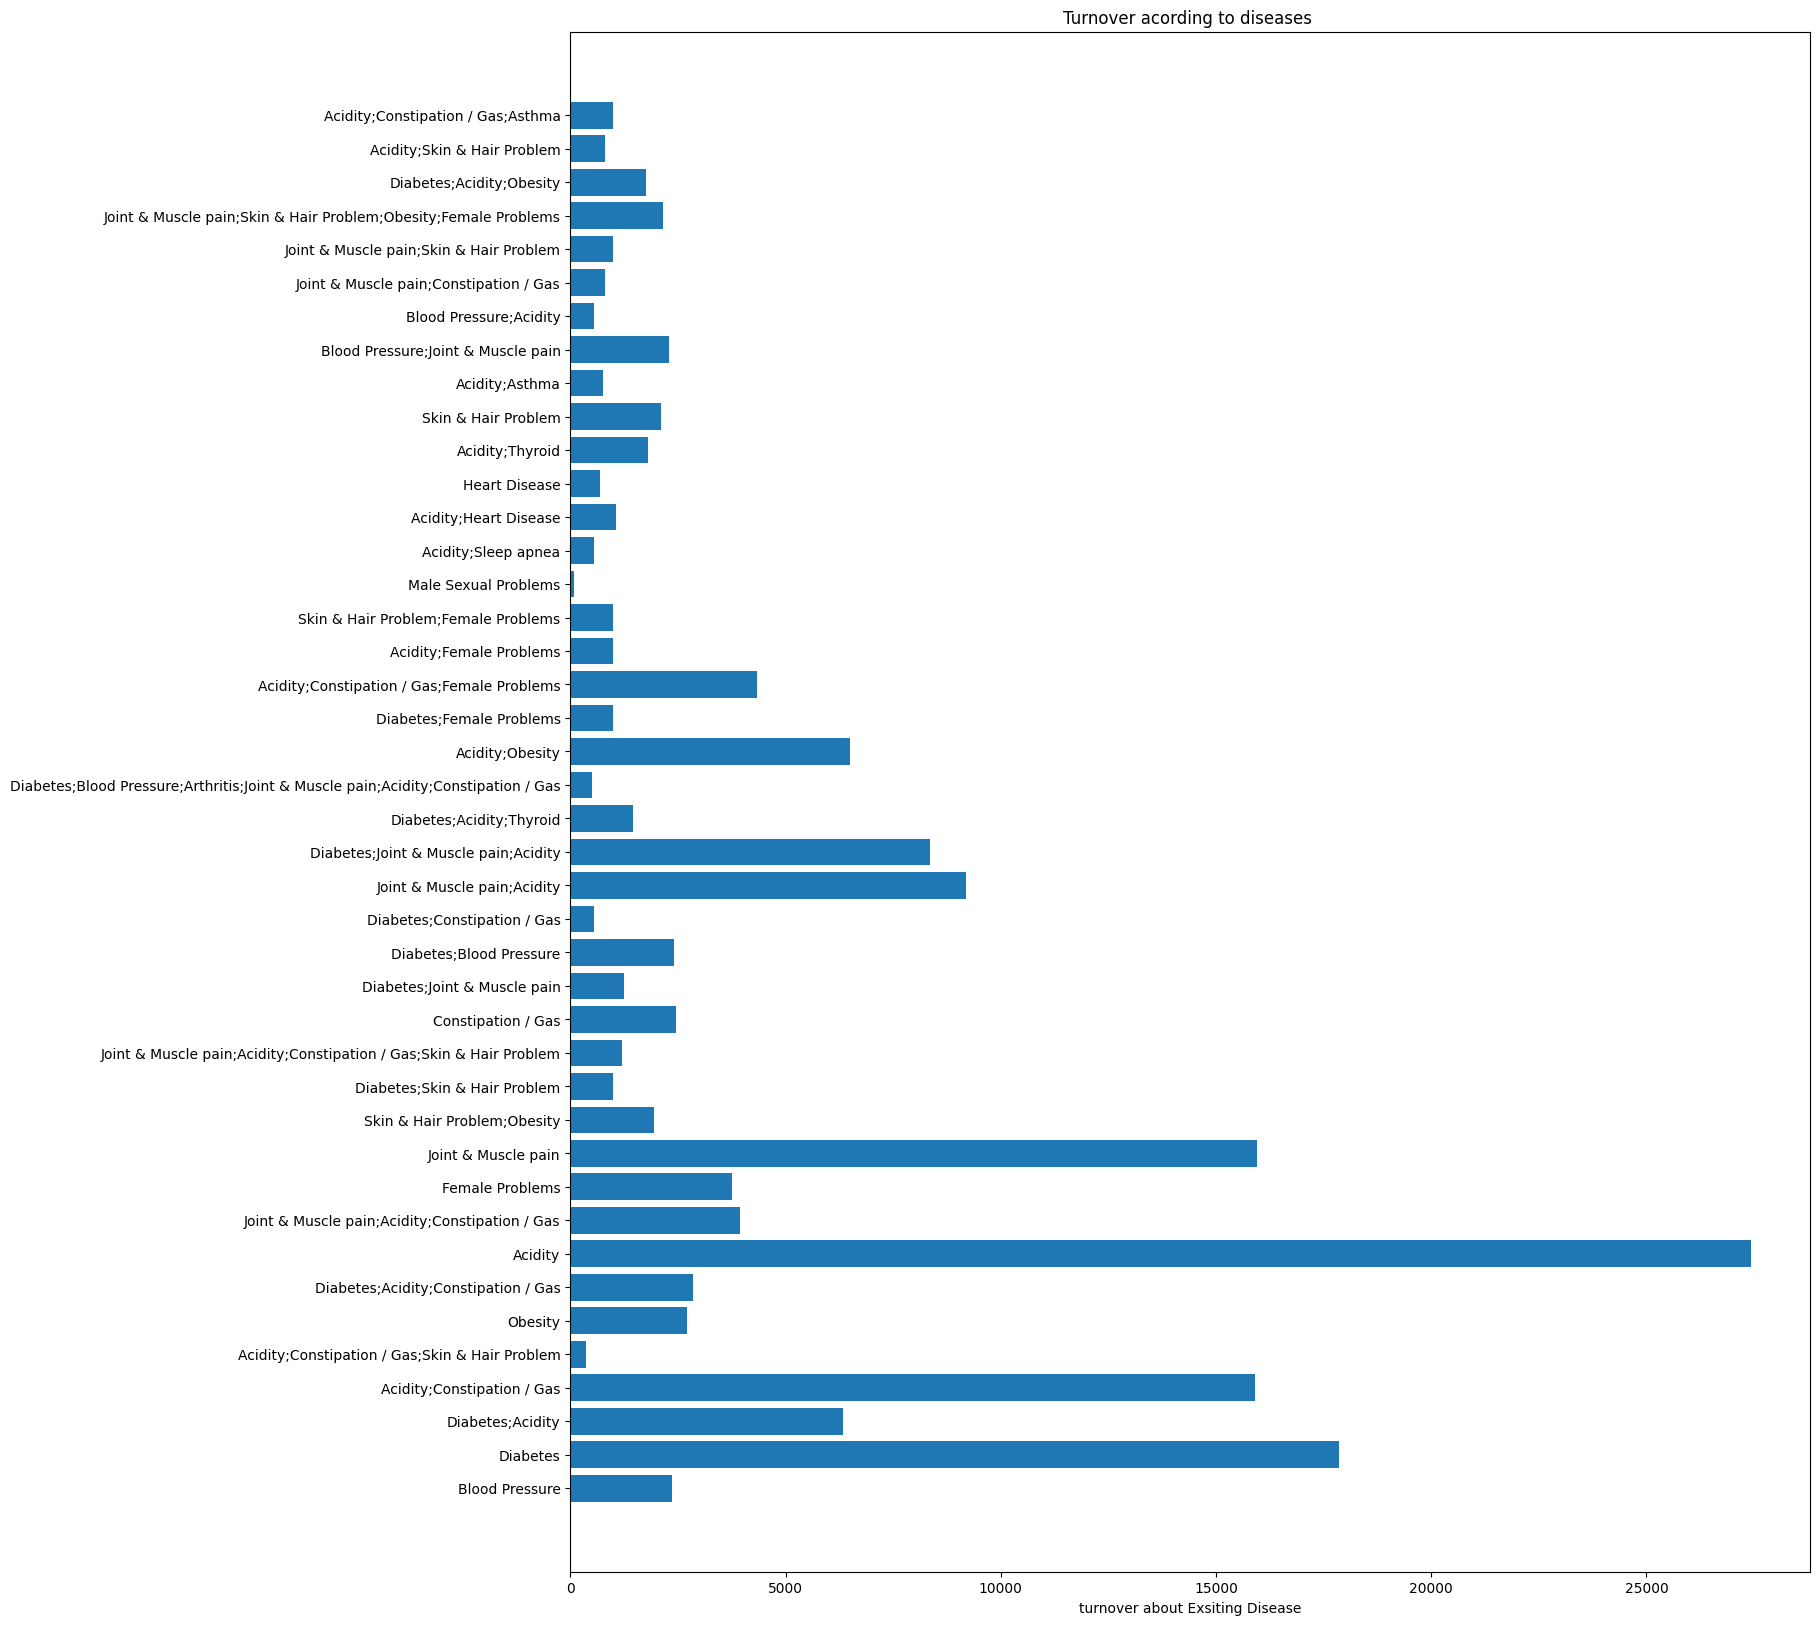

In [ ]:
plt.figure(figsize=(16, 20))
plt.barh(unique_diseases, disease_turnover)
plt.title('Turnover acording to diseases ')
plt.xlabel('turnover about Exsiting Disease')
plt.show()

            

In [ ]:
import numpy as np

visual_unique_Disease = []
visual_turnover = []
others = np.sum(disease_turnover[10:])

for i in range(len(disease_turnover[:10])):
    visual_unique_Disease.append(unique_diseases[i])
    visual_turnover.append(disease_turnover[i])

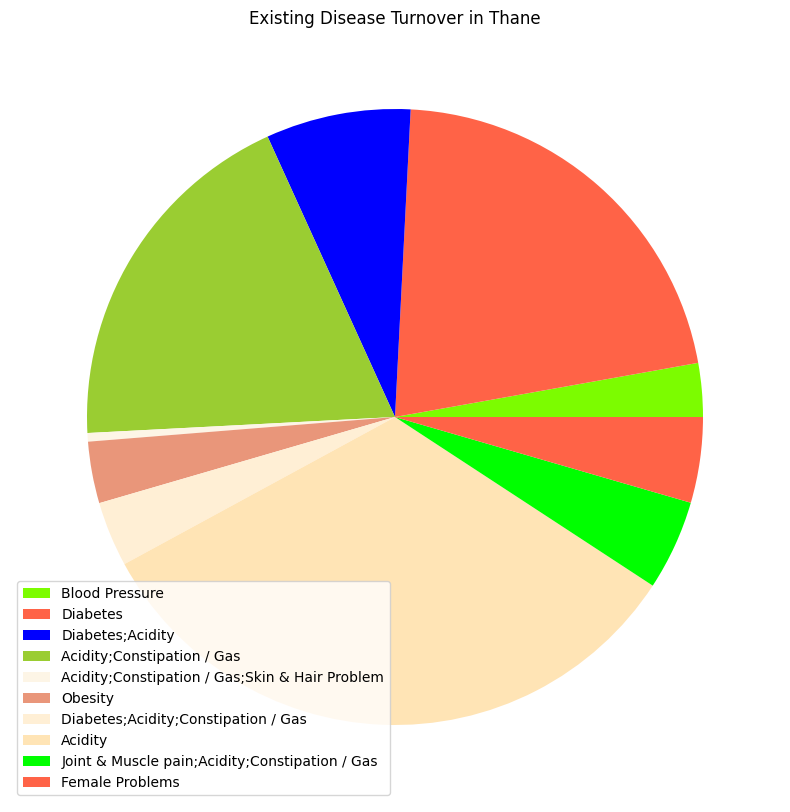

In [ ]:
import random
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_diseases))
plt.figure(figsize=(10, 10))
plt.title('Existing Disease Turnover in Thane')
plt.pie(visual_turnover, colors=c)
plt.legend(visual_unique_Disease, loc='best')
plt.show()

In [ ]:
max_to_count=pd.DataFrame(new_clean_data.groupby(['Existing Diseases'])['Turnover'].mean().reset_index())
max_to_count= max_to_count.sort_values(by='Turnover',ascending=False)
max_to_count.head(10)

,Existing Diseases,Turnover
4,Acidity;Constipation / Gas;Female Problems,2165.000000
36,Joint & Muscle pain;Skin & Hair Problem;Obesit...,2150.000000
19,Diabetes;Acidity;Obesity,1750.000000
20,Diabetes;Acidity;Thyroid,1450.000000
18,Diabetes;Acidity;Constipation / Gas,1425.000000
26,Diabetes;Joint & Muscle pain;Acidity,1391.666667
8,Acidity;Obesity,1300.000000
33,Joint & Muscle pain;Acidity;Constipation / Gas...,1210.000000
17,Diabetes;Acidity,1057.500000
27,Diabetes;Skin & Hair Problem,1000.000000
